## Import Libraries

All the libraries necessary for the execution of the processes are imported

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

## Data Extraction

The data is extracted from a csv file

In [5]:
data=pd.read_csv("Data.csv")

Shows the first five rows of our dataset

In [6]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Shows the last five rows of our dataset

In [7]:
data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


## Data Validation & Cleansing

All the columns of our dataset

In [8]:
data.columns = data.columns.str.strip()
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

No. of rows and columns in our dataset

In [9]:
data.shape

(2938, 22)

Generation of descriptive statistics to summarize central tendency, standard distribution, minimum and maximum values and percentiles

In [10]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Finding the unique values for the features

In [11]:
data.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
HIV/AIDS                            200
GDP                                2490
Population                         2278
thinness  1-19 years                200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

Find the missing values in our dataset

In [12]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Drops the rows that contain exactly 2 null values

In [13]:
data.drop(data[data.isnull().sum(axis=1) == 2].index, inplace=True)
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             66
percentage expenditure               0
Hepatitis B                        548
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                   92
Diphtheria                          19
HIV/AIDS                             0
GDP                                222
Population                         425
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Drop data from columns that show less than 15 missing data

In [14]:
data.dropna(subset=['Life expectancy', 'Adult Mortality'],inplace=True)
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                             65
percentage expenditure               0
Hepatitis B                        548
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                   92
Diphtheria                          19
HIV/AIDS                             0
GDP                                217
Population                         417
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

For the other features, we observe a large amount of missing data, and conclude that we will lose a lot if we remove all the missing data from the dataset. So, we proceed to handle this by using the imputation process.

### Imputation

Select the independent columns that have missing data

In [15]:
mean_col_list = ['Alcohol','Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria',
                 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
mean_col_list

['Alcohol',
 'Hepatitis B',
 'BMI',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

replace_mean is defined, this function replaces the null values of the series with the mean value of the series

In [16]:
def replace_mean(series):
    series = series.fillna(series.mean(), inplace=True)
    return series

The function is used by cycling through each column to convert the missing values to the mean

In [18]:
for series in mean_col_list:
    replace_mean(data[series])

data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                217
Population                         417
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources      0
Schooling                            0
dtype: int64

Fill null values in 'GDP' and 'Population' columns with the median values of their respective columns

In [19]:
data['GDP'].fillna(data['GDP'].median(),inplace=True)
data['Population'].fillna(data['Population'].median(),inplace=True)

data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

## Data Analysis

Information about the column data types, memory usage, column labels and null values

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2568 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2568 non-null   object 
 1   Year                             2568 non-null   int64  
 2   Status                           2568 non-null   object 
 3   Life expectancy                  2568 non-null   float64
 4   Adult Mortality                  2568 non-null   float64
 5   infant deaths                    2568 non-null   int64  
 6   Alcohol                          2568 non-null   float64
 7   percentage expenditure           2568 non-null   float64
 8   Hepatitis B                      2568 non-null   float64
 9   Measles                          2568 non-null   int64  
 10  BMI                              2568 non-null   float64
 11  under-five deaths                2568 non-null   int64  
 12  Polio                    

The data is taken between 2000 and 2015

In [21]:
print(data['Year'].min())
print(data['Year'].max())

2000
2015


Plot the maximum number of people from each group

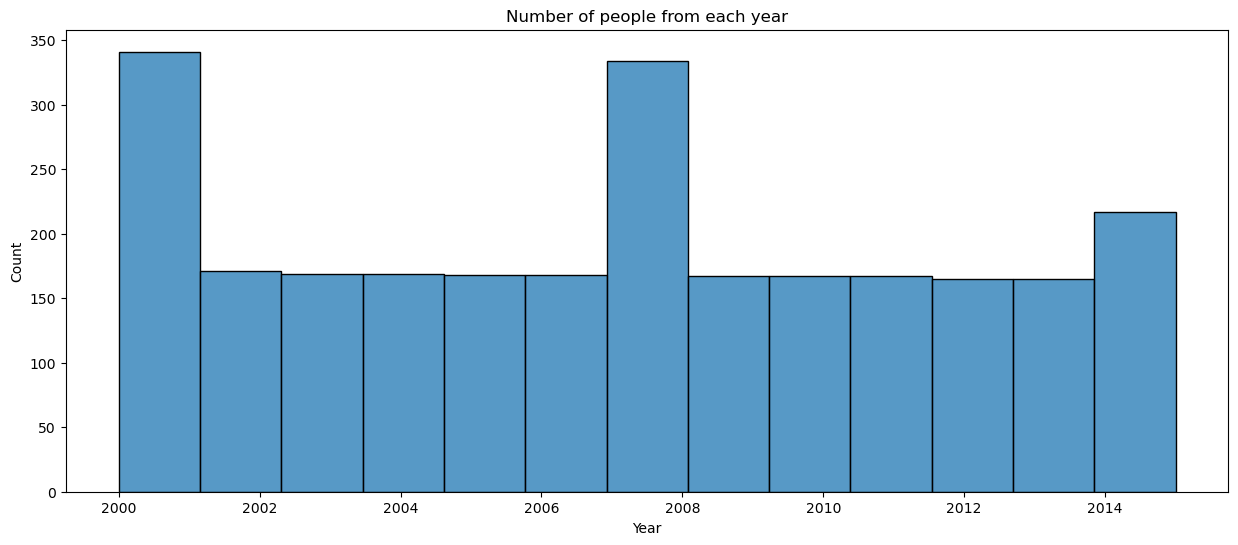

In [22]:
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x="Year")
plt.title("Number of people from each year")
plt.show()

Generation of descriptive statistics to summarize central tendency, standard distribution, minimum and maximum values and percentiles of the Life Expectancy

In [23]:
data['Life expectancy'].describe()

count    2568.000000
mean       69.086488
std         9.870356
min        36.300000
25%        62.600000
50%        72.100000
75%        76.000000
max        89.000000
Name: Life expectancy, dtype: float64

Boxplot of Life Expectancy

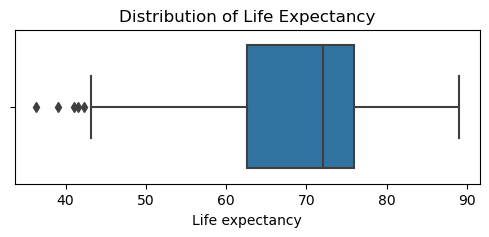

In [24]:
plt.figure(figsize=(6,2))
sns.boxplot(x= data['Life expectancy'])
plt.title('Distribution of Life Expectancy')
plt.show()

Histogram of Life Expectancy

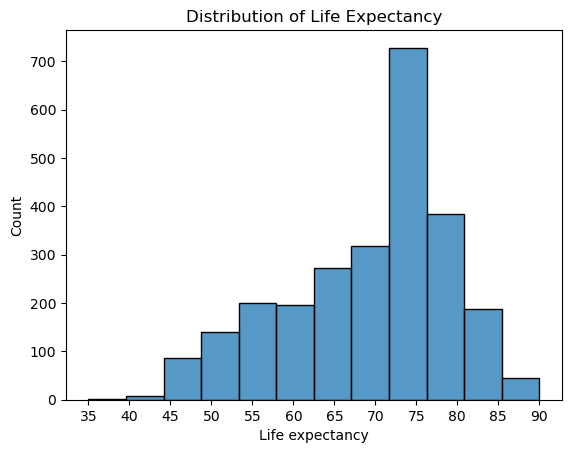

In [25]:
sns.histplot(data['Life expectancy'], binrange=(35,90), bins=12)
plt.title('Distribution of Life Expectancy')
plt.xticks(list(range(35,95,5)))
plt.show()

Boxplot of Status vs Life Expectancy

Text(0.5, 1.0, 'Box Plot for the Life expectancy with status of country')

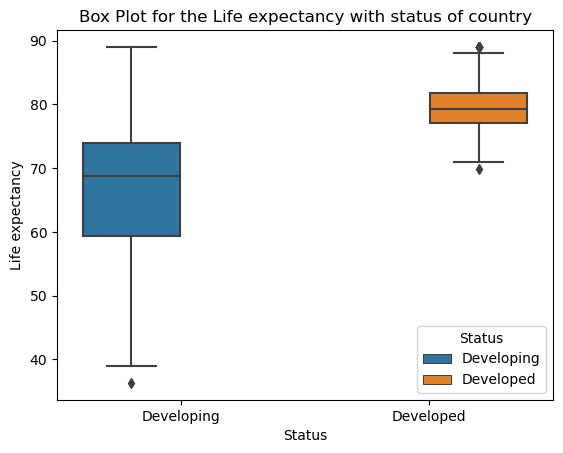

In [26]:
sns.boxplot(data,x='Status',y='Life expectancy',hue='Status')
plt.title('Box Plot for the Life expectancy with status of country')

Transforms 'Status' column from objects into booleans to be able to do mathematical analysis

In [27]:
data['Status'] = data['Status'].replace({'Developing': True , 'Developed': False})
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,True,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,True,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,True,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,True,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,True,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Calculate correlation for numerical features

In [28]:
data.corr(numeric_only=True)

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,-0.005598,0.168520,-0.081548,-0.036239,-0.043767,0.072402,0.084989,-0.084084,0.105400,...,0.104900,0.077368,0.141143,-0.137689,0.110962,0.016733,-0.053482,-0.058331,0.234414,0.203142
Status,-0.005598,1.000000,-0.492580,0.322480,0.117493,-0.602290,-0.468746,-0.090246,0.082553,-0.328515,...,-0.228434,-0.309755,-0.225427,0.160481,-0.448057,0.044347,0.380139,0.378594,-0.462161,-0.497477
Life expectancy,0.168520,-0.492580,1.000000,-0.699631,-0.197663,0.403377,0.402663,0.196696,-0.162105,0.574797,...,0.466763,0.210093,0.482626,-0.562549,0.439538,-0.028666,-0.486517,-0.481727,0.687413,0.720072
Adult Mortality,-0.081548,0.322480,-0.699631,1.000000,0.077074,-0.199352,-0.254469,-0.138397,0.031220,-0.394421,...,-0.276294,-0.109204,-0.279745,0.531323,-0.287176,-0.006185,0.308793,0.315704,-0.438571,-0.439725
infant deaths,-0.036239,0.117493,-0.197663,0.077074,1.000000,-0.117374,-0.093778,-0.193394,0.490666,-0.234912,...,-0.175421,-0.129969,-0.179931,0.021191,-0.108428,0.557799,0.477605,0.483777,-0.143631,-0.197381
Alcohol,-0.043767,-0.602290,0.403377,-0.199352,-0.117374,1.000000,0.351747,0.078146,-0.053375,0.350745,...,0.231061,0.314481,0.235278,-0.053598,0.327985,-0.030848,-0.434126,-0.422641,0.424669,0.514906
percentage expenditure,0.072402,-0.468746,0.402663,-0.254469,-0.093778,0.351747,1.000000,0.014411,-0.064631,0.255618,...,0.162783,0.184339,0.159990,-0.112263,0.917191,-0.022256,-0.270124,-0.271600,0.404114,0.411331
Hepatitis B,0.084989,-0.090246,0.196696,-0.138397,-0.193394,0.078146,0.014411,1.000000,-0.099585,0.140024,...,0.392643,0.051534,0.478392,-0.105125,0.062343,-0.129204,-0.110738,-0.112485,0.143439,0.156164
Measles,-0.084084,0.082553,-0.162105,0.031220,0.490666,-0.053375,-0.064631,-0.099585,1.000000,-0.181928,...,-0.142048,-0.108103,-0.148924,0.027834,-0.075122,0.238351,0.223434,0.219674,-0.118267,-0.128390
BMI,0.105400,-0.328515,0.574797,-0.394421,-0.234912,0.350745,0.255618,0.140024,-0.181928,1.000000,...,0.295976,0.220187,0.298287,-0.248930,0.293088,-0.072931,-0.530634,-0.537613,0.484225,0.525010


 Create correlation heatmap

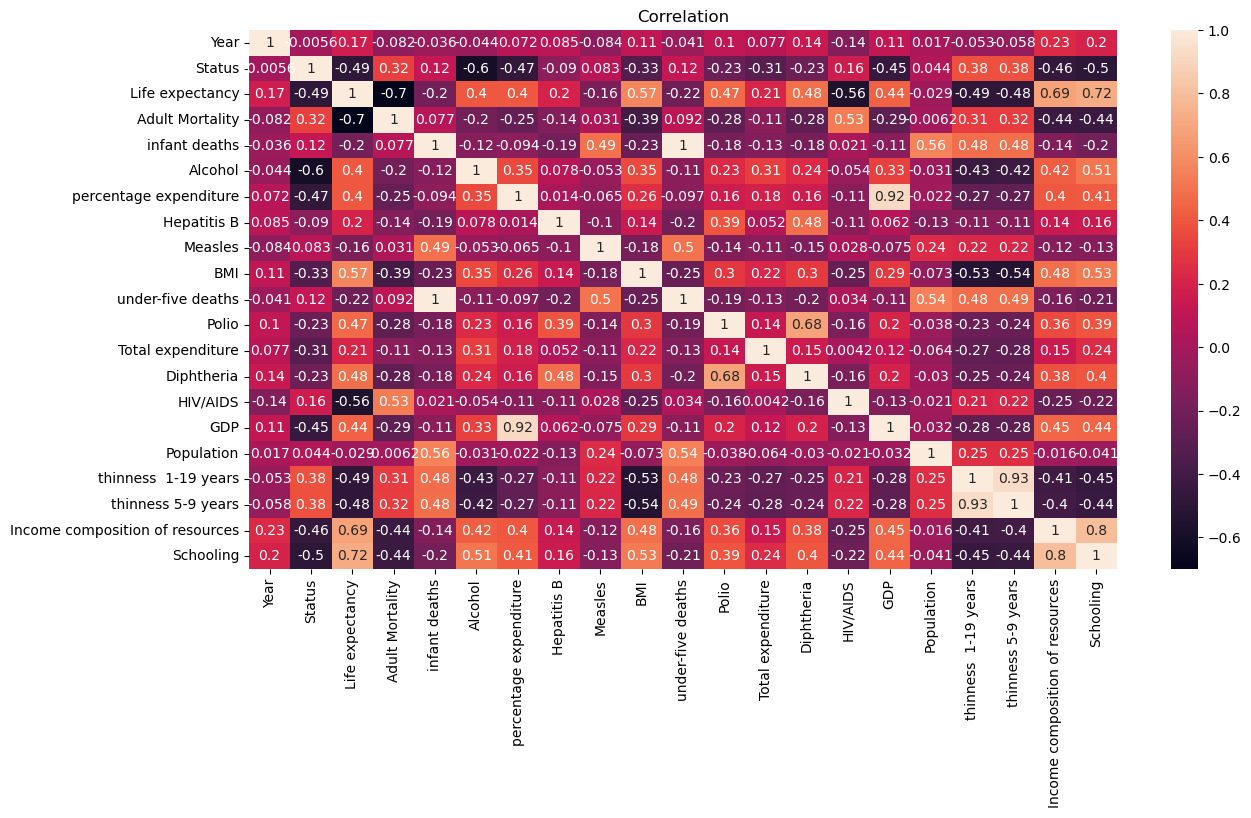

In [29]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title('Correlation')
plt.show()

In [31]:
variable_list = ['Schooling', 'Income composition of resources', 'GDP', 'Diphtheria', 
                'Polio', 'BMI', 'percentage expenditure', 'Alcohol', 'Life expectancy','Status','Adult Mortality']
data_req = data[variable_list]
data_req.head()

,Schooling,Income composition of resources,GDP,Diphtheria,Polio,BMI,percentage expenditure,Alcohol,Life expectancy,Status,Adult Mortality
0,10.1,0.479,584.259210,65.0,6.0,19.1,71.279624,0.01,65.0,True,263.0
1,10.0,0.476,612.696514,62.0,58.0,18.6,73.523582,0.01,59.9,True,271.0
2,9.9,0.470,631.744976,64.0,62.0,18.1,73.219243,0.01,59.9,True,268.0
3,9.8,0.463,669.959000,67.0,67.0,17.6,78.184215,0.01,59.5,True,272.0
4,9.5,0.454,63.537231,68.0,68.0,17.2,7.097109,0.01,59.2,True,275.0


In [32]:
data_req.corr()

,Schooling,Income composition of resources,GDP,Diphtheria,Polio,BMI,percentage expenditure,Alcohol,Life expectancy,Status,Adult Mortality
Schooling,1.000000,0.797196,0.442688,0.396764,0.394729,0.525010,0.411331,0.514906,0.720072,-0.497477,-0.439725
Income composition of resources,0.797196,1.000000,0.452570,0.379541,0.361108,0.484225,0.404114,0.424669,0.687413,-0.462161,-0.438571
GDP,0.442688,0.452570,1.000000,0.195809,0.203483,0.293088,0.917191,0.327985,0.439538,-0.448057,-0.287176
Diphtheria,0.396764,0.379541,0.195809,1.000000,0.681570,0.298287,0.159990,0.235278,0.482626,-0.225427,-0.279745
Polio,0.394729,0.361108,0.203483,0.681570,1.000000,0.295976,0.162783,0.231061,0.466763,-0.228434,-0.276294
BMI,0.525010,0.484225,0.293088,0.298287,0.295976,1.000000,0.255618,0.350745,0.574797,-0.328515,-0.394421
percentage expenditure,0.411331,0.404114,0.917191,0.159990,0.162783,0.255618,1.000000,0.351747,0.402663,-0.468746,-0.254469
Alcohol,0.514906,0.424669,0.327985,0.235278,0.231061,0.350745,0.351747,1.000000,0.403377,-0.602290,-0.199352
Life expectancy,0.720072,0.687413,0.439538,0.482626,0.466763,0.574797,0.402663,0.403377,1.000000,-0.492580,-0.699631
Status,-0.497477,-0.462161,-0.448057,-0.225427,-0.228434,-0.328515,-0.468746,-0.602290,-0.492580,1.000000,0.322480


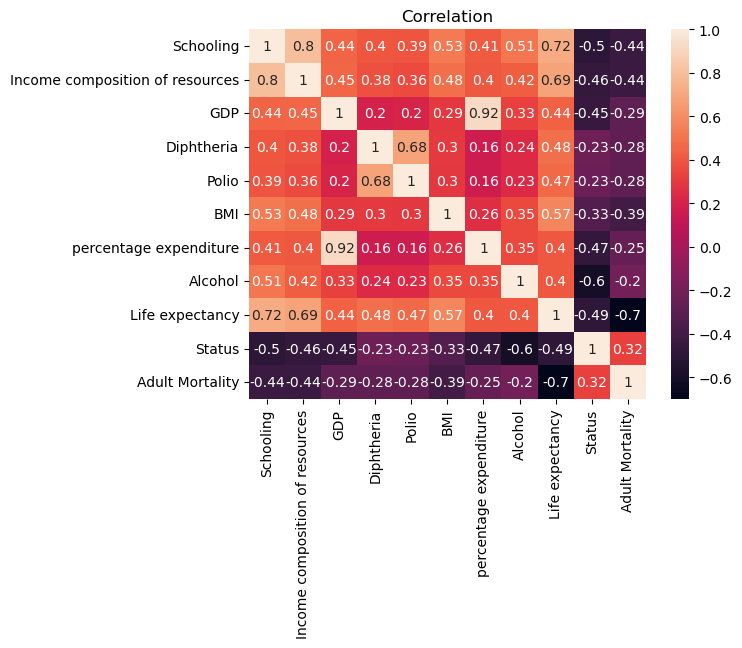

In [34]:
sns.heatmap(data_req.corr(), annot=True)
plt.title('Correlation')
plt.show()

## Data Visualization

Scatter plot showing the relationship between Life Expectancy and BMI

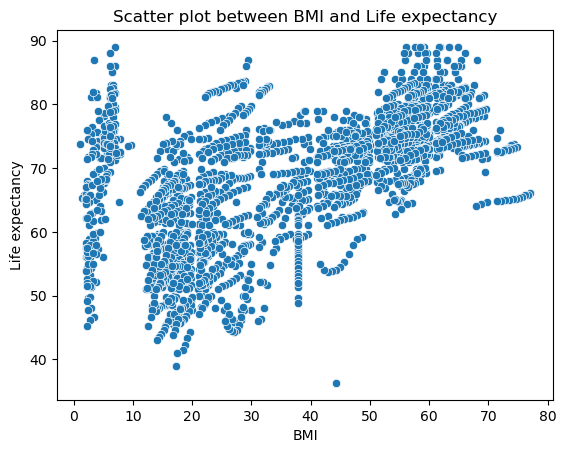

In [35]:
sns.scatterplot(x=data['BMI'], y=data['Life expectancy'])
plt.title('Scatter plot between BMI and Life expectancy')
plt.show()

Scatter plot showing the relationship between Life Expectancy and Schooling

C:\Users\91951\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


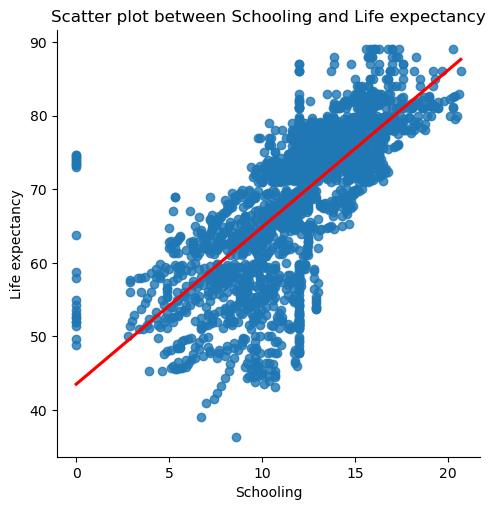

In [36]:
sns.lmplot(x='Schooling', y='Life expectancy', data=data, ci=None,line_kws={'color': 'red'})
plt.title('Scatter plot between Schooling and Life expectancy')
plt.show()

Scatter plot showing the relationship between Life Expectancy and Adult Mortality

C:\Users\91951\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


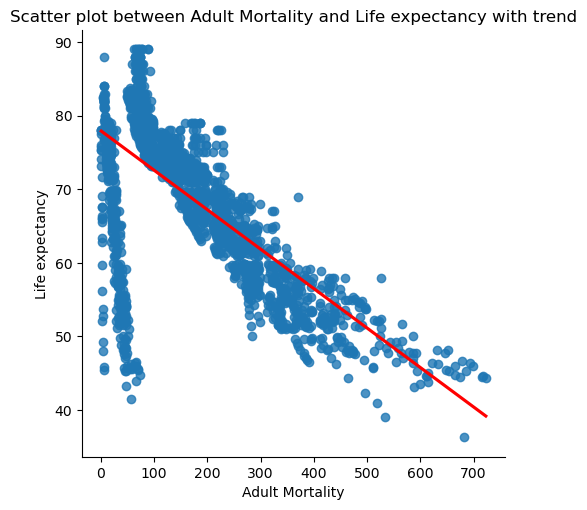

In [37]:
sns.lmplot(x='Adult Mortality', y='Life expectancy', data=data, ci=None,line_kws={'color': 'red'})
plt.title('Scatter plot between Adult Mortality and Life expectancy with trend')
plt.show()

Scatter plot showing the relationship between Life Expectancy and Income Composition

C:\Users\91951\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


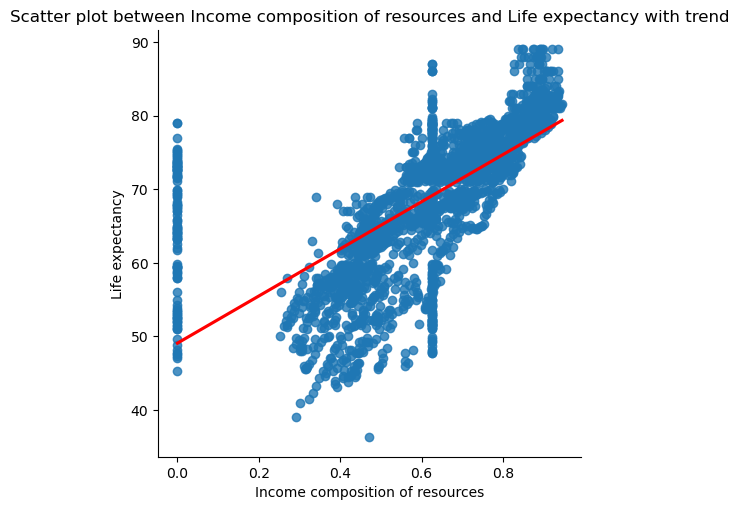

In [38]:
sns.lmplot(x='Income composition of resources', y='Life expectancy', data=data, ci=None,line_kws={'color': 'red'})
plt.title('Scatter plot between Income composition of resources and Life expectancy with trend')
plt.show()

### Model Training and Testing

Useful features are selected for the models

In [39]:
variable_list = ['Schooling', 'Income composition of resources', 'GDP', 'Diphtheria', 
                'Polio', 'BMI', 'percentage expenditure', 'Alcohol', 'Life expectancy','Status','Adult Mortality']
data_last = data[variable_list]
data_last.head()

,Schooling,Income composition of resources,GDP,Diphtheria,Polio,BMI,percentage expenditure,Alcohol,Life expectancy,Status,Adult Mortality
0,10.1,0.479,584.259210,65.0,6.0,19.1,71.279624,0.01,65.0,True,263.0
1,10.0,0.476,612.696514,62.0,58.0,18.6,73.523582,0.01,59.9,True,271.0
2,9.9,0.470,631.744976,64.0,62.0,18.1,73.219243,0.01,59.9,True,268.0
3,9.8,0.463,669.959000,67.0,67.0,17.6,78.184215,0.01,59.5,True,272.0
4,9.5,0.454,63.537231,68.0,68.0,17.2,7.097109,0.01,59.2,True,275.0


Splitting the dataset into training and testing data

In [40]:
X = data_last.drop('Life expectancy', axis=1)
y = data_last['Life expectancy']

print(X.shape)
print(y.shape)

(2568, 10)
(2568,)


Scaling down the values using Standard Scaler

In [41]:
scaler=StandardScaler()
X_standardized_data = scaler.fit_transform(X)
print(X_standardized_data)

[[-0.56828525 -0.68578491 -0.46517338 ... -1.16050108  0.47638951
   0.75790404]
 [-0.59827891 -0.69994404 -0.46313099 ... -1.16050108  0.47638951
   0.82002281]
 [-0.62827257 -0.72826231 -0.46176291 ... -1.16050108  0.47638951
   0.79672827]
 ...
 [-0.59827891 -0.93120986 -0.5030166  ... -0.05854579  0.47638951
  -0.71741677]
 [-0.65826623 -0.93120986 -0.46773537 ... -0.73417901  0.47638951
   4.04243406]
 [-0.65826623 -0.89817189 -0.4678236  ... -0.74415146  0.47638951
   3.87937228]]


Splitting the training dataset into X_train, X_test, y_train and y_test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized_data, y, test_size=0.2, random_state=42)

## 1. Multiple Linear Regression Model (MLRM)

Initiate the multiple linear regression model and fit into the training data

In [43]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

Save predicted data

In [44]:
y_pred = LR.predict(X_test)

Evaluate the model performance on the training data

In [45]:
print('Coefficient of determination: ', LR.score(X_train, y_train))

Coefficient of determination:  0.7601066061178725


Calculate R² score

In [46]:
r2_lr = r2_score(y_test, y_pred)
print(f'R² Score: {r2_lr}')

R² Score: 0.7718243293316682


Calculate Mean Absolute Error (MAE)

In [47]:
mae_lr = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae_lr}')

Mean Absolute Error (MAE): 3.4575975777139814


Calculate Mean Squared Error (MSE)

In [48]:
mse_lr = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse_lr}')

Mean Squared Error (MSE): 21.815731848560837


Calculate Root Mean Squared Error (RMSE)

In [49]:
rmse_lr=np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rmse_lr)

RMSE:  4.670731404026658


## 2. Random Forest Regression Model (RFRM)

Initiate the random forest regression model and fit into the testing data

In [50]:
RF = RandomForestRegressor(n_estimators=100,random_state=42)
RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Save predicted data

In [51]:
y_pred1 = RF.predict(X_test)

Evaluate the model performance on the training data

In [52]:
print('Coefficient of determination: ', RF.score(X_train, y_train))

Coefficient of determination:  0.9937121257951484


Calculate R² score

In [53]:
r2_rf = r2_score(y_test, y_pred1)
print(f'R² Score: {r2_rf}')

R² Score: 0.9600533926301058


Calculate Mean Absolute Error (MAE)

In [54]:
mae_rf = mean_absolute_error(y_test, y_pred1)
print(f'Mean Absolute Error (MAE): {mae_rf}')

Mean Absolute Error (MAE): 1.2572479324933592


Calculate Mean Squared Error (MSE)

In [55]:
mse_rf = mean_squared_error(y_test, y_pred1)
print(f'Mean Squared Error (MSE): {mse_rf}')

Mean Squared Error (MSE): 3.8192699164149104


Calculate Root Mean Squared Error (RMSE)

In [56]:
rmse_rf=np.sqrt(mean_squared_error(y_test, y_pred1))
print('RMSE: ', rmse_rf)

RMSE:  1.9542952480152302


## Utilization of Analysis Results

1. Multiple Linear Regression Model (MLRM)

Create results dataframe

In [57]:
results_MLRM = pd.DataFrame({'actual': y_test, 'predicted': y_pred.ravel(), 'residual': y_test - y_pred})
results_MLRM.head()

,actual,predicted,residual
2799,78.7,77.784548,0.915452
1007,78.4,79.539340,-1.139340
1329,81.1,77.243442,3.856558
541,48.1,59.501763,-11.401763
719,66.6,66.867198,-0.267198


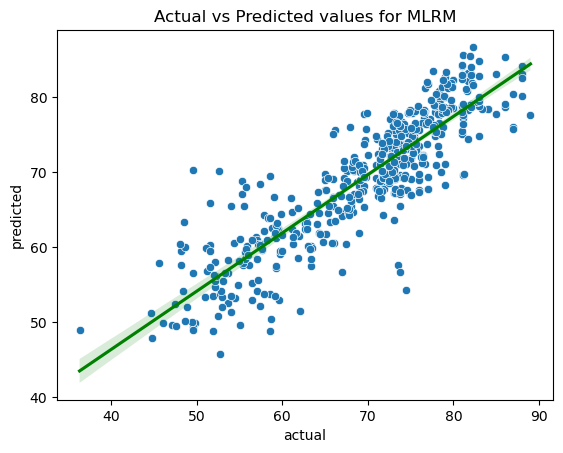

In [58]:
sns.scatterplot(x='actual', y='predicted', data=results_MLRM)
sns.regplot(x='actual',y='predicted', data=results_MLRM, color='Green',scatter=False)
plt.title('Actual vs Predicted values for MLRM')
plt.show()

2. Random Forest Regression Model (RFRM)

Create results dataframe

In [59]:
results_RFRM = pd.DataFrame({'actual': y_test, 'predicted': y_pred1.ravel(), 'residual': y_test - y_pred1})
results_RFRM.head()

,actual,predicted,residual
2799,78.7,78.748,-0.048
1007,78.4,78.495,-0.095
1329,81.1,81.837,-0.737
541,48.1,48.504,-0.404
719,66.6,67.643,-1.043


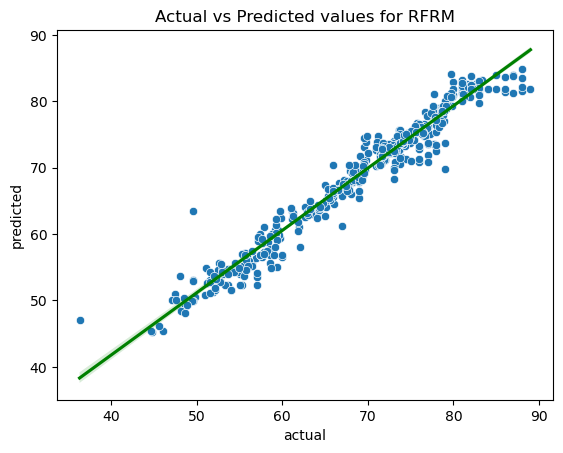

In [60]:
sns.scatterplot(x='actual', y='predicted', data=results_RFRM)
sns.regplot(x='actual',y='predicted', data=results_RFRM, color='Green',scatter=False)
plt.title('Actual vs Predicted values for RFRM')
plt.show()